In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('../Linear Regression/DATA/rock_density_xray.csv')
df.columns = ['Signal','Density']
df.head()

,Signal,Density
0,72.945124,2.456548
1,14.229877,2.601719
2,36.597334,1.967004
3,9.578899,2.300439
4,21.765897,2.452374


In [3]:
X = df['Signal'].values.reshape(-1,1)
y = df['Density']

In [4]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(X , y , test_size=0.3 , random_state=101)

In [9]:
from sklearn.metrics import mean_absolute_error , mean_squared_error
def run_model(model , x_train , x_test , y_train , y_test):
    model.fit(x_train , y_train)
    y_pred = model.predict(x_test)
    print(mean_absolute_error(y_test , y_pred))
    print(np.sqrt(mean_squared_error(y_test , y_pred)))

    signals = np.arange(0,100)
    output = model.predict(signals.reshape(-1,1))

    sns.scatterplot(x='Signal',y='Density' , data=df , color='red')
    plt.plot(signals , output)
    

0.2369211828242142
0.29280140172610514


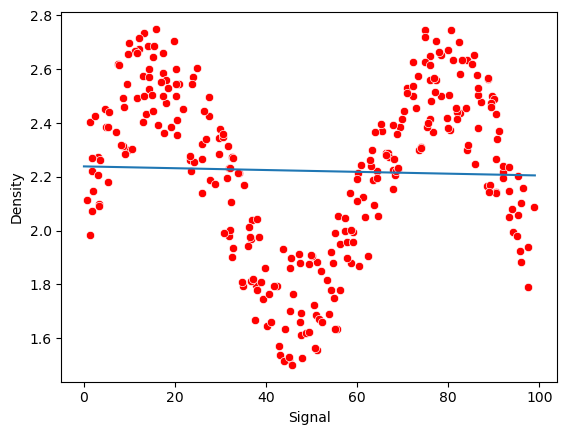

In [10]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
run_model(model , x_train , x_test , y_train , y_test)

0.23134009845636822
0.27448005553248184


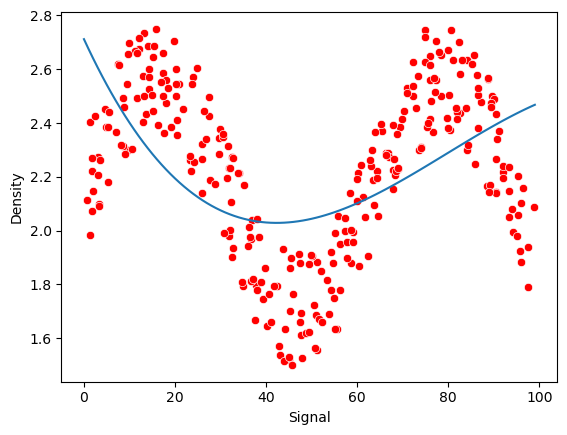

In [11]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
pipe = make_pipeline(PolynomialFeatures(degree=3) , LinearRegression())
run_model(pipe , x_train , x_test , y_train , y_test)

[0.2369211828242143, 0.23856273226353789, 0.23134009845636822, 0.12117794200509169, 0.12055850448832181, 0.11503333955039897, 0.1147304107758257, 0.11446237908189454, 0.11370117713163429, 0.11539266593439683, 0.12387880252021544]


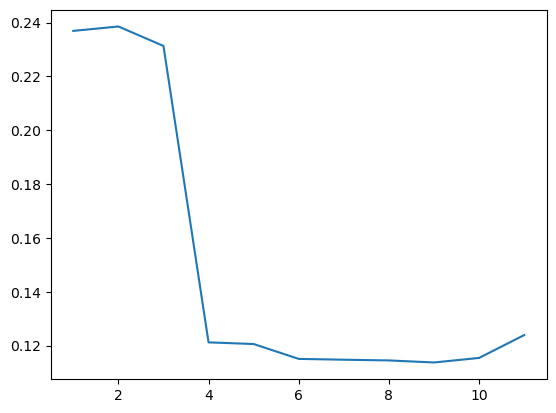

In [14]:
polys = np.arange(1,12)
errors = []
for i in polys:
    pipe_model = make_pipeline(PolynomialFeatures(degree=i) , LinearRegression())
    pipe_model.fit(x_train , y_train)
    y_pred = pipe_model.predict(x_test)
    errors.append(mean_absolute_error(y_test , y_pred))

plt.plot(range(1,12) , errors)
print(errors)

0.12817936228823248
0.16153547162673088
0.11823219946159098
0.1400166117231861
0.12059189553582521
0.1408050741503751


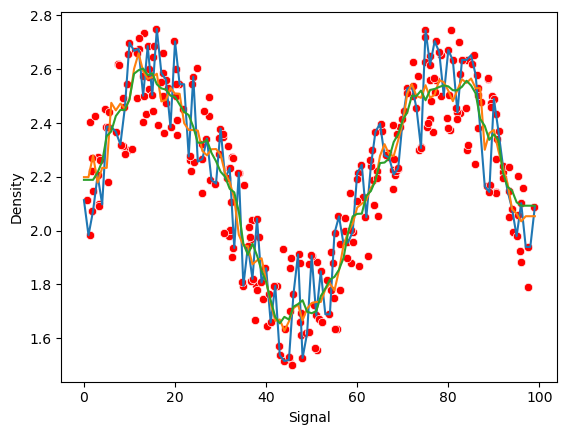

In [16]:
from sklearn.neighbors import KNeighborsRegressor
k_values = [1,5,10]
for i in k_values :
    model = KNeighborsRegressor(n_neighbors=i )
    run_model(model , x_train , x_test , y_train , y_test)

0.12817936228823248
0.16153547162673088


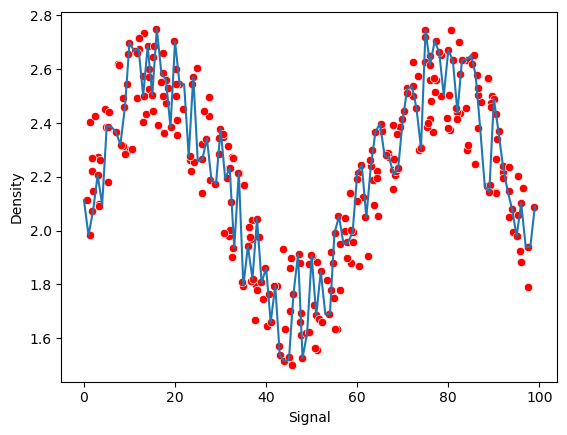

In [18]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()
run_model(model , x_train , x_test , y_train , y_test)

0.11127327567318512
0.13004609494553804


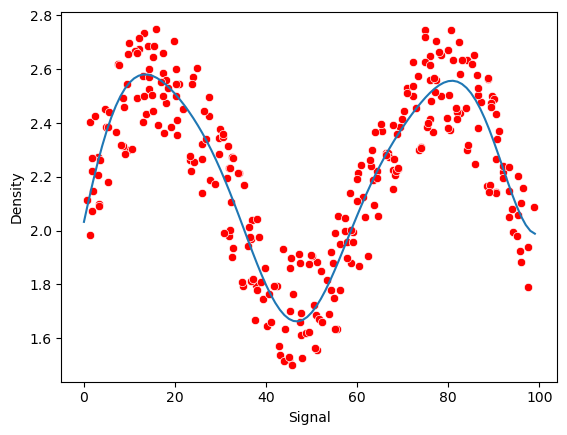

In [21]:
from sklearn.svm import SVR
model = SVR()
from sklearn.model_selection import GridSearchCV
param_grid = {'C':[0.01 , 0.1 , 1 , 10 , 100 , 1000] , 'gamma':['auto','scale']}
grid = GridSearchCV(model , param_grid)
run_model(grid , x_train , x_test , y_train , y_test)

0.12309877014354215
0.15065615439969973


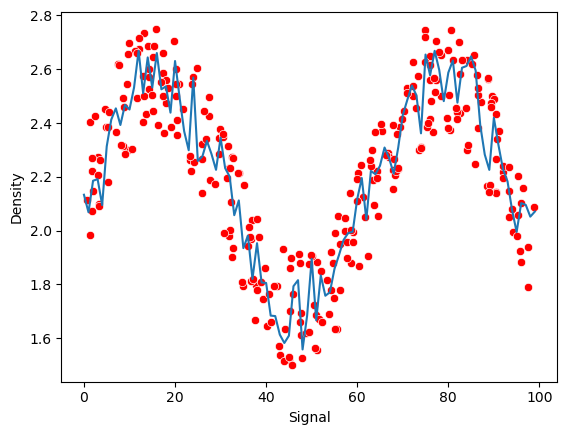

In [26]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(n_estimators=8)
run_model(rfr , x_train , x_test , y_train , y_test)